Fit to KPNO J-band light curve of 1SWASPJ011351.29+314909.7 from [Gomez Maqueo-Chew et al. (2014)](https://ui.adsabs.harvard.edu/abs/2014A%26A...572A..50G/abstract).


In [1]:
%pylab inline
from pycheops.models import FactorModel, EclipseModel 
from lmfit import report_fit
from pycheops.constants import R_SunN, c

Populating the interactive namespace from numpy and matplotlib


In [2]:
T_0 = 6023.26988
P = 14.2769001
k = 0.0081/0.0534
i = 89.084
aR = 1/0.0534
L = 0.00737 # planet-star flux ratio
ecc = 0.3098
omega = 278.85

D = k**2
b = aR*np.cos(i*np.pi/180)
W = np.sqrt((1+k)**2 - b**2)/np.pi/aR
S = ((1-k)**2-b**2)/((1+k)**2 - b**2)
f_c = sqrt(ecc)*cos(omega*pi/180)
f_s = sqrt(ecc)*sin(omega*pi/180)
asini_rsun = 25.808 # Semi-major axis in solar radii
a_c = asini_rsun*R_SunN/c/86400.0  # Light travel time correction in days

In [3]:
m = EclipseModel()*FactorModel()
pars = m.make_params(L=L, f_c=f_c, f_s = f_s)
pars['T_0'].set(value=T_0, vary=False)
pars['P'].set(value=P, vary=False)
pars['D'].set(value=D, vary=False)
pars['W'].set(value=W, vary=False)
pars['S'].set(value=S, vary=False)
pars['a_c'].set(value=a_c, vary=False)

In [4]:
jdata = np.loadtxt('J0113+31_J-band.csv',delimiter=',')
bjd_obs = jdata[:,0]
lc_obs = 10**(-0.4*(jdata[:,1]))
lc_err =  10**(-0.4*(jdata[:,1]-jdata[:,2])) - lc_obs
ph_obs = ((bjd_obs-T_0)/P % 1) - 1

Vertical lines are contact point measured by-eye from Fig. 3

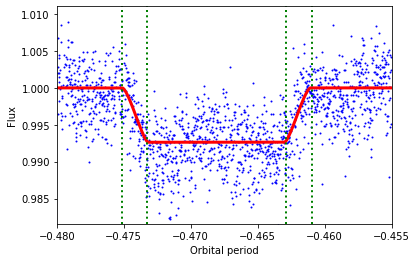

In [5]:
ph_plt = np.linspace(-0.480, -0.455, 10001)
t_plt = T_0 + P*ph_plt
lc_plt = m.eval(params=pars, t=t_plt)
fig,ax=subplots()
ax.plot(ph_obs, lc_obs,'bo',ms=1)
ax.plot(ph_plt, lc_plt,'r',lw=3)
ax.set_xlabel('Orbital period')
ax.set_ylabel('Flux')
ax.set_xlim(min(ph_plt),max(ph_plt))
ax.set_ylim(1-2.5*L,1+1.5*L)
for tt in [-0.47515, -0.47324, -0.46288, -0.46097]:
    ax.plot([tt,tt],[1-2.5*L,1+1.5*L],ls=':',c='g',lw=2)


In [6]:
result = m.fit(lc_obs, pars, t=bjd_obs, weights=1/lc_err)
report_fit(result)

[[Fit Statistics]]
    # fitting method   = leastsq
    # function evals   = 7
    # data points      = 1564
    # variables        = 2
    chi-square         = 1704.68752
    reduced chi-square = 1.09134924
    Akaike info crit   = 138.715416
    Bayesian info crit = 149.425419
[[Variables]]
    T_0:        6023.27 (fixed)
    P:          14.2769 (fixed)
    D:          0.02300846 (fixed)
    W:          0.01890311 (fixed)
    S:          0.5094084 (fixed)
    L:          0.00744284 +/- 1.8243e-04 (2.45%) (init = 0.00737)
    f_c:        0.0856314 (fixed)
    f_s:       -0.5499702 (fixed)
    a_c:        0.0006931734 (fixed)
    d2fdt2:     0 (fixed)
    dfdt:       0 (fixed)
    dfdcosphi:  0 (fixed)
    dfdsinphi:  0 (fixed)
    d2fdy2:     0 (fixed)
    d2fdxdy:    0 (fixed)
    d2fdx2:     0 (fixed)
    dfdy:       0 (fixed)
    dfdx:       0 (fixed)
    c:          0.99936169 +/- 1.2486e-04 (0.01%) (init = 1)
    k:          0.15168539 +/- 0.00000000 (0.00%) == 'sqrt(D)'
    J:  

(<Figure size 432x432 with 2 Axes>, GridSpec(2, 1, height_ratios=[1, 4]))

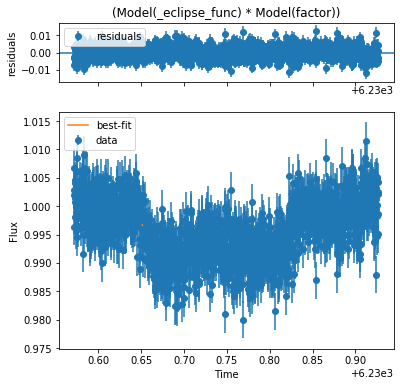

In [7]:
result.plot(xlabel='Time',ylabel='Flux')

&copy; Pierre Maxted, Keele University, 2019